In [1]:
import librosa
import librosa.display
import numpy as np
import glob
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
spektogram, labels = [], []
folders = ["OAF_Sad", "OAF_angry", "OAF_happy"]

In [3]:
for folder in folders:
    for spc in glob.glob("dataset/" + folder + "/*"):
        y, sr = librosa.load(spc)
        spec = np.abs(librosa.stft(y))
        spec = librosa.amplitude_to_db(spec, ref=np.max)
        spec = cv2.resize(spec, (64, 64))
        spec = spec.flatten()
        spektogram.append(spec)
        labels.append(folder)

data = pd.DataFrame(spektogram)
data["Label"] = labels
data.to_csv("spektogram.csv", index=False)

In [4]:
df = pd.read_csv("spektogram.csv")

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,-53.947403,-58.010162,-56.007854,-58.154940,-56.721954,-55.964170,-60.817448,-54.449642,-55.957970,-59.727386,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad
1,-56.680070,-53.136818,-66.619970,-66.850520,-61.113052,-63.374720,-60.666157,-59.610330,-64.715805,-66.174340,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad
2,-59.279175,-59.364210,-57.678867,-57.691050,-64.752426,-68.444660,-56.830140,-60.440647,-60.664543,-65.896680,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad
3,-55.088280,-55.980930,-54.053844,-57.570225,-59.133410,-53.457344,-57.844383,-47.275253,-56.824560,-65.398530,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad
4,-63.262688,-67.423225,-57.511776,-50.259518,-56.068382,-54.664314,-57.393692,-50.493675,-42.074116,-46.831856,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad


In [6]:
df.shape

(600, 4097)

In [7]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
4092     float64
4093     float64
4094     float64
4095     float64
Label     object
Length: 4097, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()
le = LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])

In [9]:
X = df.drop("Label", axis=1).values
y = df["Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
tree = DecisionTreeClassifier(max_depth=24)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=24)

Text(0.5, 1.0, 'Testing')

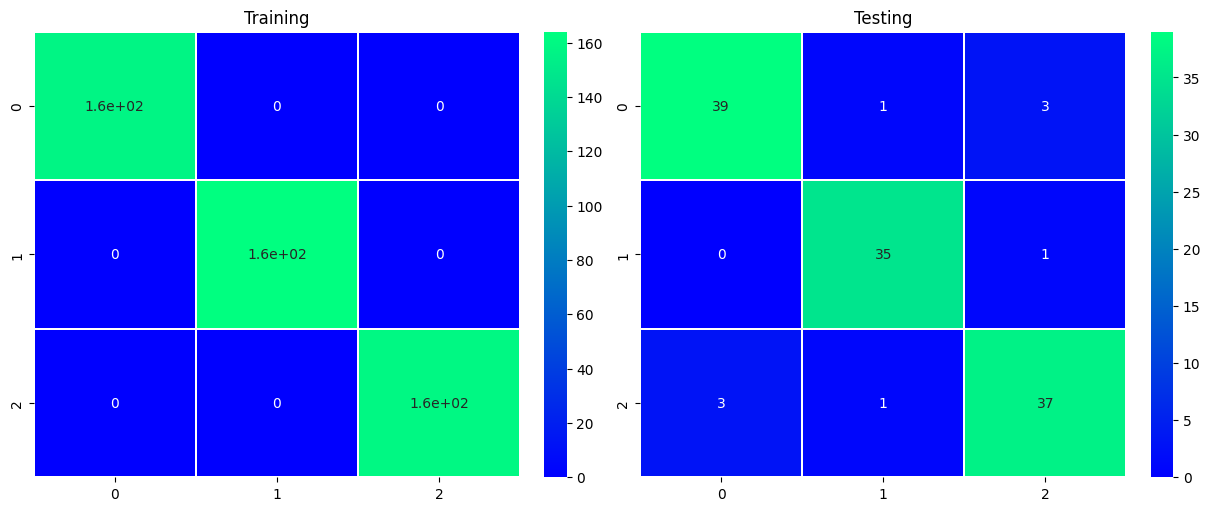

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, tree.predict(X_train)), annot=True, 
linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, tree.predict(X_test)), annot=True,
linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")

In [15]:
print("Training\n", classification_report(y_train, tree.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       159

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [16]:
print("Testing\n", classification_report(y_test, tree.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.95      0.97      0.96        36
           2       0.90      0.90      0.90        41

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.92      0.93      0.92       120



In [17]:
svm = SVC().fit(X_train, y_train)

Text(0.5, 1.0, 'Testing')

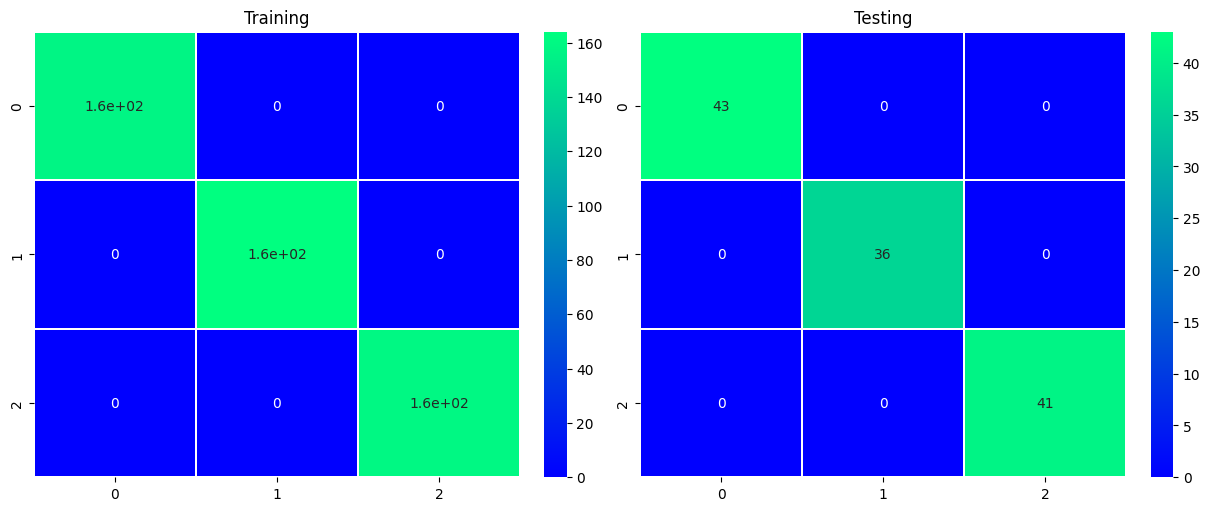

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, svm.predict(X_train)), annot=True, 
linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True,
linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")

In [19]:
print("Training\n", classification_report(y_train, svm.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       159

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [20]:
print("Testing\n", classification_report(y_test, svm.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        41

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [21]:
knn = KNeighborsClassifier().fit(X_train, y_train)

Text(0.5, 1.0, 'Testing')

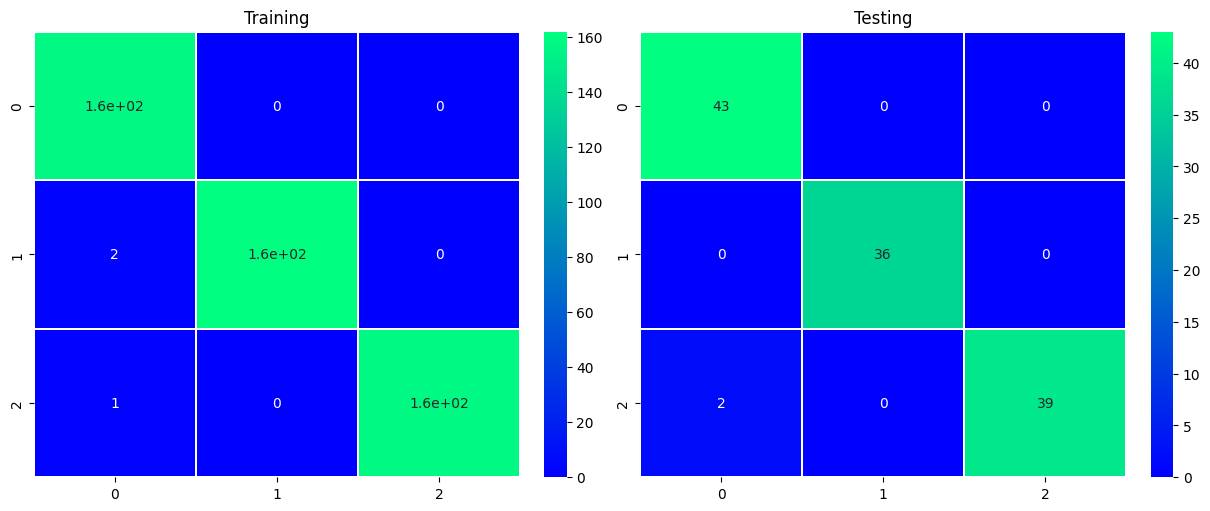

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train)), annot=True, 
linewidths=0.2, linecolor="white", cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True,
linewidths=0.2, linecolor="white", cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")

In [23]:
print("Training\n", classification_report(y_train, knn.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       157
           1       1.00      0.99      0.99       164
           2       1.00      0.99      1.00       159

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



In [24]:
print("Testing\n", classification_report(y_test, knn.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      1.00      1.00        36
           2       1.00      0.95      0.97        41

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

